In [4]:
import pandas as pd
import random
import datetime

# Sample data including new fields
data = {
    'MAC': ['00:11:22:33:44:55', 'AA:BB:CC:DD:EE:FF', '11:22:33:44:55:66'],
    'IP Address': ['192.168.0.101', '192.168.0.102', '192.168.0.103'],
    'Device Name': ['Laptop', 'Smartphone', 'Tablet'],
    'Interface': ['eth0', 'wlan0', 'eth0'],
    'Requested IP': ['192.168.0.100', '192.168.0.101', '192.168.0.102'],
    'Time': [datetime.datetime.now(), datetime.datetime.now(), datetime.datetime.now()],
    'Channel': [random.choice([1, 6, 11]) for _ in range(3)], 
    'Frequency': [random.choice(['2.4 GHz', '5 GHz']) for _ in range(3)], 
    'DNS Requests': [random.choice(['example.com', 'google.com', 'yahoo.com']) for _ in range(3)],
    'Connection Status': [random.choice(['Connected', 'Disconnected', 'Failed']) for _ in range(3)]
}


df = pd.DataFrame(data)


selected_rows = pd.concat([df.head(5), df.tail(5)], ignore_index=True)
selected_rows.to_csv('network_logs.csv', index=False)

print("First 5 and last 5 logs have been saved to 'network_logs.csv'")


First 5 and last 5 logs have been saved to 'network_logs.csv'


In [10]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('network_logs.csv')
# Display the first few rows of the DataFrame
print(df.head())

# Get basic statistics about the data
print(df.describe())

# Check the data types of columns
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())


                 MAC     IP Address Device Name Interface   Requested IP  \
0  00:11:22:33:44:55  192.168.0.101      Laptop      eth0  192.168.0.100   
1  AA:BB:CC:DD:EE:FF  192.168.0.102  Smartphone     wlan0  192.168.0.101   
2  11:22:33:44:55:66  192.168.0.103      Tablet      eth0  192.168.0.102   
3  00:11:22:33:44:55  192.168.0.101      Laptop      eth0  192.168.0.100   
4  AA:BB:CC:DD:EE:FF  192.168.0.102  Smartphone     wlan0  192.168.0.101   

                         Time  Channel Frequency DNS Requests  \
0  2023-09-12 23:09:04.927158        1     5 GHz   google.com   
1  2023-09-12 23:09:04.927158        6     5 GHz    yahoo.com   
2  2023-09-12 23:09:04.927158       11     5 GHz    yahoo.com   
3  2023-09-12 23:09:04.927158        1     5 GHz   google.com   
4  2023-09-12 23:09:04.927158        6     5 GHz    yahoo.com   

  Connection Status  
0            Failed  
1            Failed  
2            Failed  
3            Failed  
4            Failed  
         Channel
cou

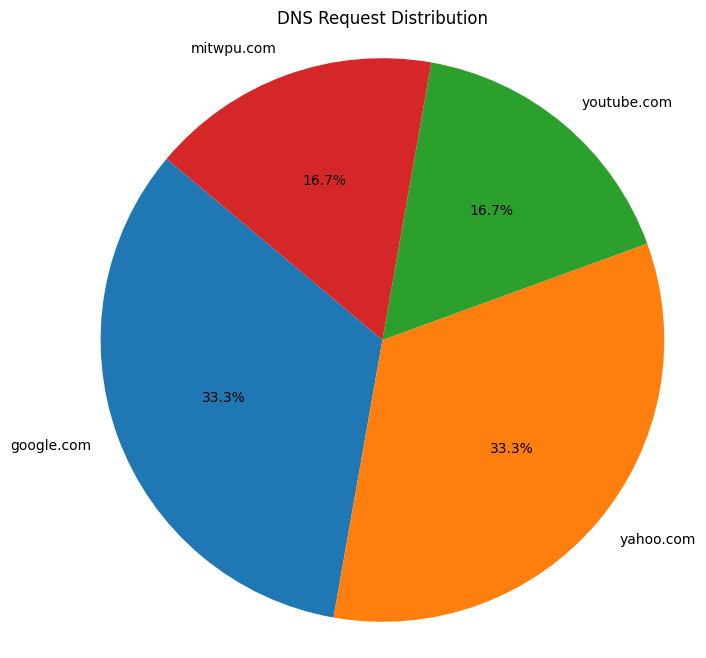

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame (replace 'network_logs.csv' with your file path)
df = pd.read_csv('network_logs.csv')



# Analyze DNS Requests with a Pie Chart
dns_counts = df['DNS Requests'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(dns_counts, labels=dns_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('DNS Request Distribution')
plt.axis('equal')  # Make the pie chart circular
plt.show()

# Analyze Time Distribution with a Bar Chart
df['Time'] = pd.to_datetime(df['Time'])  # Convert 'Time' to datetime objects
df['Hour'] = df['Time'].dt.hour  # Extract the hour from 'Time'
hour_counts = df['Hour'].value_counts().sort_index()



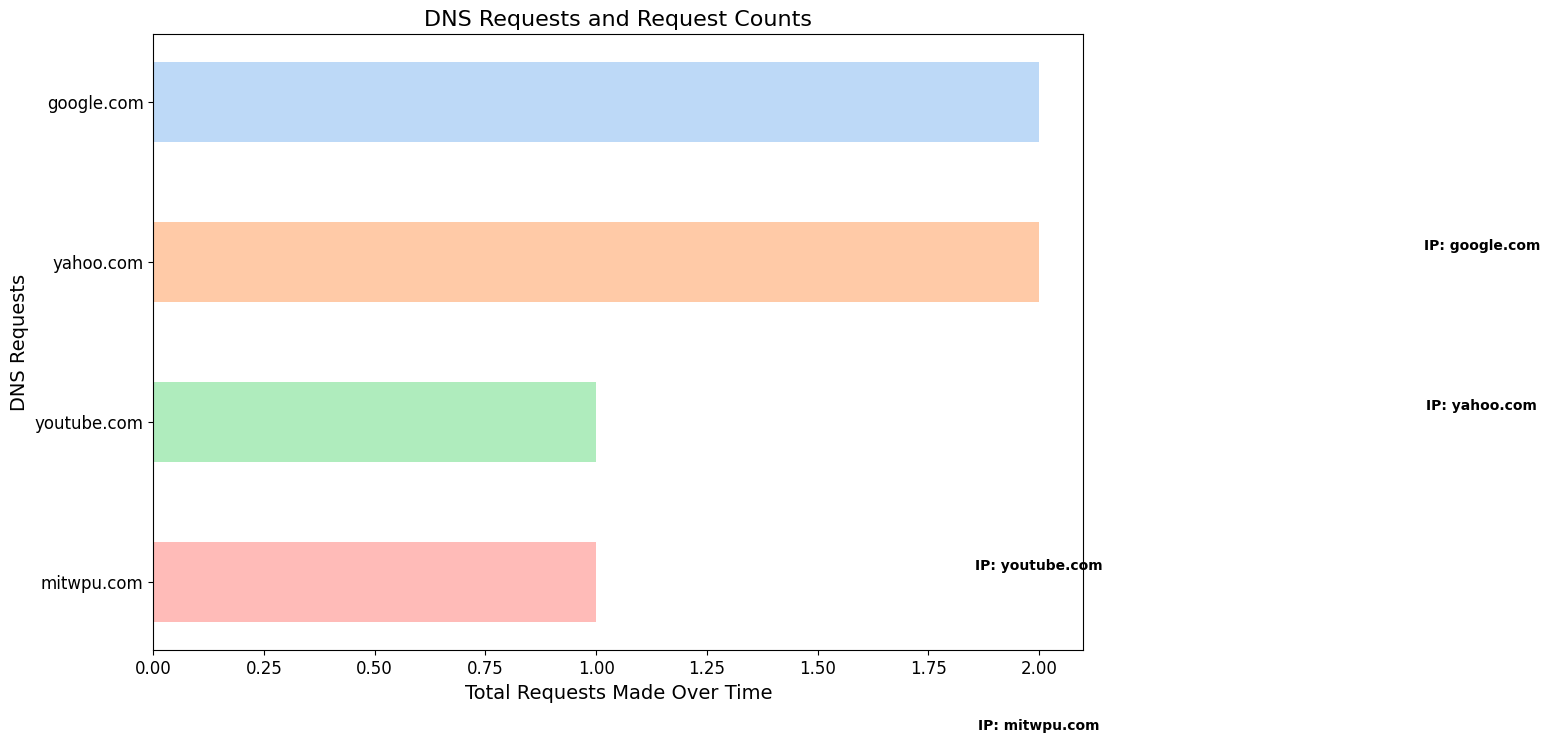

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
your_data = pd.read_csv('network_logs.csv')  # Replace 'network_logs.csv' with the actual file path

# Assuming you have columns 'Requested IP' and 'DNS Requests' in your DataFrame
destination_websites = your_data['DNS Requests'].value_counts()
destination_websites = destination_websites.sort_values(ascending=False)

# Create a color palette (you can choose from various palettes)
colors = sns.color_palette('pastel')  # You can change 'pastel' to other palette names

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Invert the y-axis so that website names are displayed from top to bottom
plt.gca().invert_yaxis()

# Create horizontal bars with IP addresses and label them with request counts
bars = plt.barh(destination_websites.index, destination_websites.values, color=colors, alpha=0.7, height=0.5)

# Labeling and titling
plt.xlabel('Total Requests Made Over Time', fontsize=14)
plt.ylabel('DNS Requests', fontsize=14)
plt.title('DNS Requests and Request Counts', fontsize=16)

# Set the size of the tick labels
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(12)

# Display the IP addresses on the bars
for i, (bar, count) in enumerate(zip(bars, destination_websites.values), start=1):
    ip_address = destination_websites.index[i - 1]
    plt.text(count + 1, i - 0.1, f'IP: {ip_address}', ha='center', va='center', fontsize=10, fontweight='bold')

# Show the plot
plt.show()


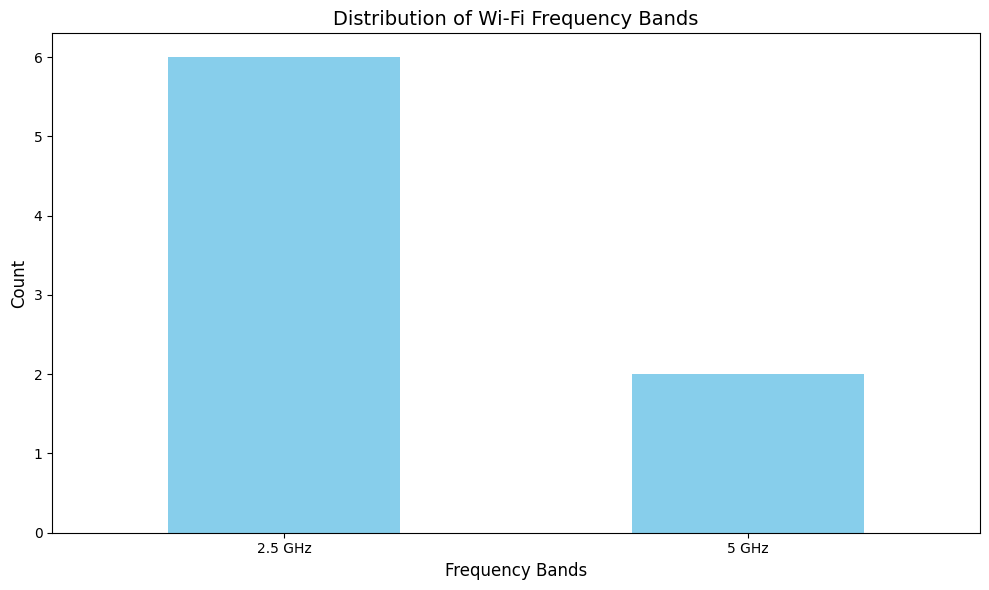

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
your_data = pd.read_csv('network_logs.csv')  # Replace 'network_logs.csv' with the actual file path

# Assuming you have a 'Frequency' column in your DataFrame
frequency_counts = your_data['Frequency'].value_counts()

# Create a bar graph for the 'Frequency' data
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Frequency Bands', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Wi-Fi Frequency Bands', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display the bar graph
plt.tight_layout()
plt.show()


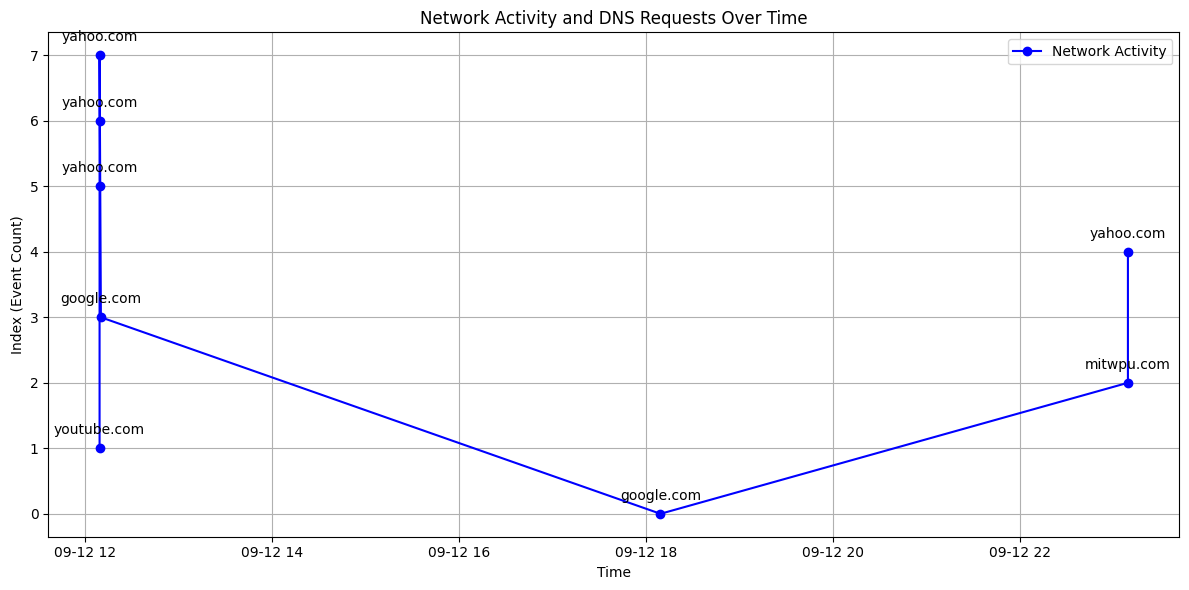

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('network_logs.csv')  # Replace 'network_logs.csv' with the actual file path

# Convert the "Time" column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Sort the DataFrame by the "Time" column (optional, for better visualization)
df.sort_values(by='Time', inplace=True)

# Create the Time Series Plot
plt.figure(figsize=(12, 6))

# Plot DNS Requests over time
plt.plot(df['Time'], df.index, marker='o', linestyle='-', color='b', label='Network Activity')
plt.xlabel('Time')
plt.ylabel('Index (Event Count)')

# Plot DNS Requests as text annotations on the plot
for index, row in df.iterrows():
    plt.annotate(row['DNS Requests'], (row['Time'], index), textcoords="offset points", xytext=(0, 10),
                 ha='center', fontsize=10)

plt.title('Network Activity and DNS Requests Over Time')
plt.grid(True)
plt.legend()

# Show the Time Series Plot
plt.tight_layout()
plt.show()


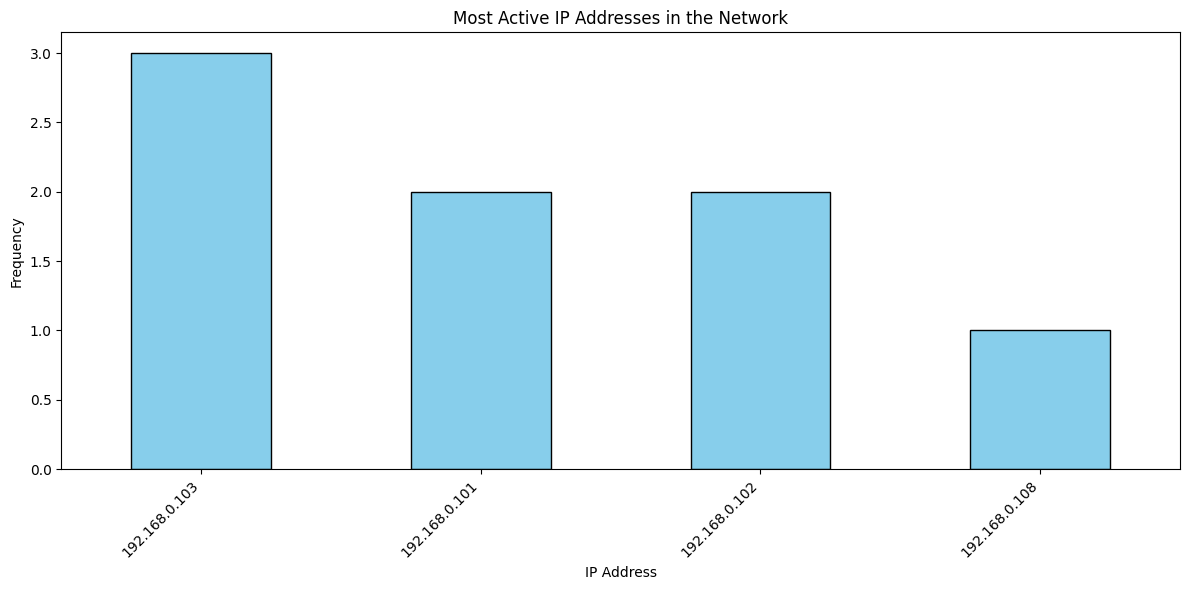

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('network_logs.csv')  # Replace 'network_logs.csv' with the actual file path

# Calculate the counts of each unique IP Address
ip_counts = df['IP Address'].value_counts()

# Create the Bar Chart
plt.figure(figsize=(12, 6))
ip_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('IP Address')
plt.ylabel('Frequency')
plt.title('Most Active IP Addresses in the Network')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the Bar Chart
plt.tight_layout()
plt.show()


In [16]:
print(your_data.columns)


Index(['MAC', 'IP Address', 'Device Name', 'Interface', 'Requested IP', 'Time',
       'Channel', 'Frequency', 'DNS Requests', 'Connection Status'],
      dtype='object')
